In [1]:
from peft import PeftConfig, PeftModel, PeftModelForCausalLM
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoConfig

adapter_model_name = "/vepfs/wcf/G/zecheng/ckpt/dpo-llama/checkpoint-2050/trainable" 
base_model_name = "/vepfs/wcf/G/zecheng/hf_models/Llama-2-7b-hf"
config = AutoConfig.from_pretrained(base_model_name)
config.rope_scaling = {"type": "dynamic", "factor": 4}
config.rope_theta = 1e5

model = AutoModelForCausalLM.from_pretrained(base_model_name, config=config)
model = PeftModelForCausalLM.from_pretrained(model, adapter_model_name).to('cuda:7')
base_model = AutoModelForCausalLM.from_pretrained(base_model_name, config=config)
tokenizer = AutoTokenizer.from_pretrained(base_model_name)

/opt/conda/envs/pan/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]
/opt/conda/envs/pan/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/opt/conda/envs/pan/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:520: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is on

In [31]:
model

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(32000, 4096, padding_idx=0)
        (layers): ModuleList(
          (0-31): 32 x LlamaDecoderLayer(
            (self_attn): LlamaSdpaAttention(
              (q_proj): lora.Linear(
                (base_layer): Linear(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=8, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=8, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
              )
              (k_proj): lora.Linear(
                (base_layer): Linear

In [34]:
import torch
text = 'The best thing to do in San Francisco is to eat a sandwich and sit in Dolores Park on a sunny day. The best thing to do in New York is to walk around the city and visit the Statue of Liberty.<s><s> {"features":[{"feature_idx":0,"name":"text","type":{"dtype":"string","_type":"Value"}},{"feature_idx":1,"name":"prompt","type":{"dtype":"string","_type":"Value"}},{"feature_idx":2,"name":"completion","type":{"dtype":"string","_type":"Value"}}],"rows":[{"row_idx":0,"row":{"text":"Chapter: \\"Mine ear is open, and my heart prepared:\\n  The worst is worldly loss thou canst unfold:\\n  Say, is my kingdom lost?\\"\\n\\n  SHAKESPEARE.\\n\\n\\nIt was a feature peculiar to the colonial wars of North America, that\\nthe toils and dangers of the wilderness were to be encountered before\\nthe adverse hosts could meet. A wide and apparently an impervious\\nboundary of forests severed the possessions of the hostile provinces of\\nFrance and England. The hardy colonist, and the trained European who\\nfought at his side, frequently expended months in struggling against the\\nrapids of the streams, or in effecting the rugged passes of the\\nmountains, in quest of an opportunity to exhibit their courage in a more\\nmartial conflict. But, emulating the patience and self-denial of the\\npractised native warriors, they learned to overcome every difficulty;\\nand it would seem that, in time, there was no recess of the woods so\\ndark, nor any secret place so lovely, that it might claim exemption from\\nthe inroads of those who had pledged their blood to satiate their\\nvengeance, or to uphold the cold and selfish policy of the distant\\nmonarchs of Europe.\\n\\nPerhaps no district throughout the wide extent of the intermediate\\nfrontiers can furnish a livelier picture of the cruelty and fierceness\\nof the savage warfare of those periods than the country which lies\\nbetween the head waters of the Hudson and the adjacent lakes.\\n\\nThe facilities which nature had there offered to the march of the\\ncombatants were too obvious to be neglected. The lengthened sheet of the\\nChamplain stretched from the frontiers of Canada, deep within the\\nborders of the neighboring province of New York, forming a natural\\npassage across half the distance that the French were compelled to\\nmaster in order to strike their enemies. Near its southern termination,\\nit received the contributions of another lake, whose waters were so\\nlimpid as to have been exclusively selected by the Jesuit missionaries\\nto perform the typical purification of baptism, and to obtain for it the\\ntitle of lake \\"du Saint Sacrement.\\" The less zealous English thought\\nthey conferred a sufficient honor on its unsullied fountains, when they\\nbestowed the name of their reigning prince, the second of the house of\\nHanover. The two united to rob the untutored possessors of its wooded\\nscenery of their native right to perpetuate its original appellation of\\n\\"Horican.\\"[1]\\n\\nWinding its way among countless islands, and imbedded in mountains, the\\n\\"holy lake\\"\nQuestion: What is the best thing to do in New York ? The best thing to do in New York is to'
input_ids = tokenizer(text, return_tensors="pt").to(model.device)
with torch.no_grad():
    res = model.generate(**input_ids, return_dict_in_generate=True, output_attentions=True, max_new_tokens=64)
# response = tokenizer.decode()
# response = self.enc.decode(decode_res[0], skip_special_tokens=True).strip()

/opt/conda/envs/pan/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/opt/conda/envs/pan/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:520: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


In [35]:
print(res['attentions'][0][0].shape)
print(len(res['attentions'][0]))
print(len(res['attentions']))

torch.Size([1, 32, 827, 827])
32
64


In [49]:
res['attentions'][0][-1].detach().cpu().numpy().shape

(1, 32, 827, 827)

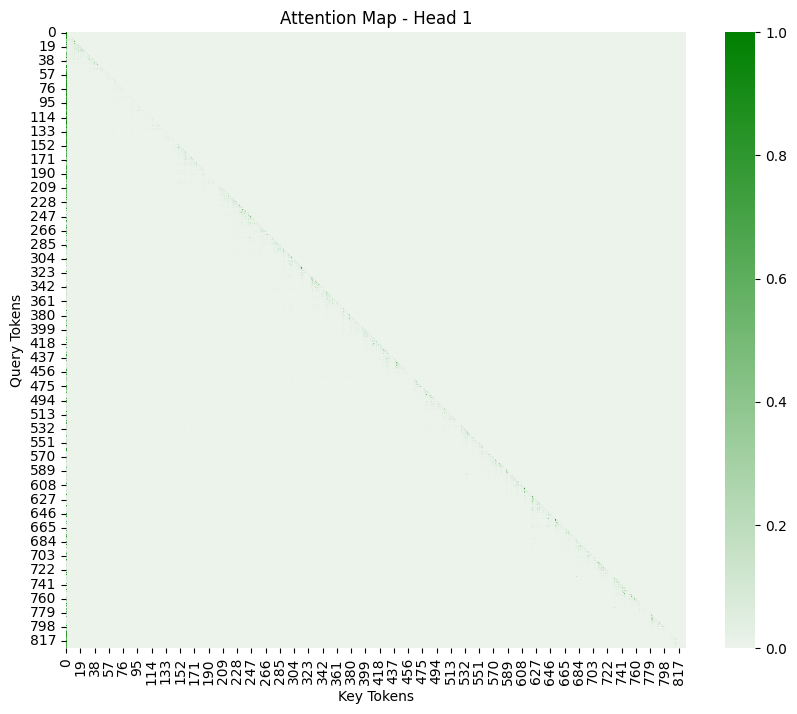

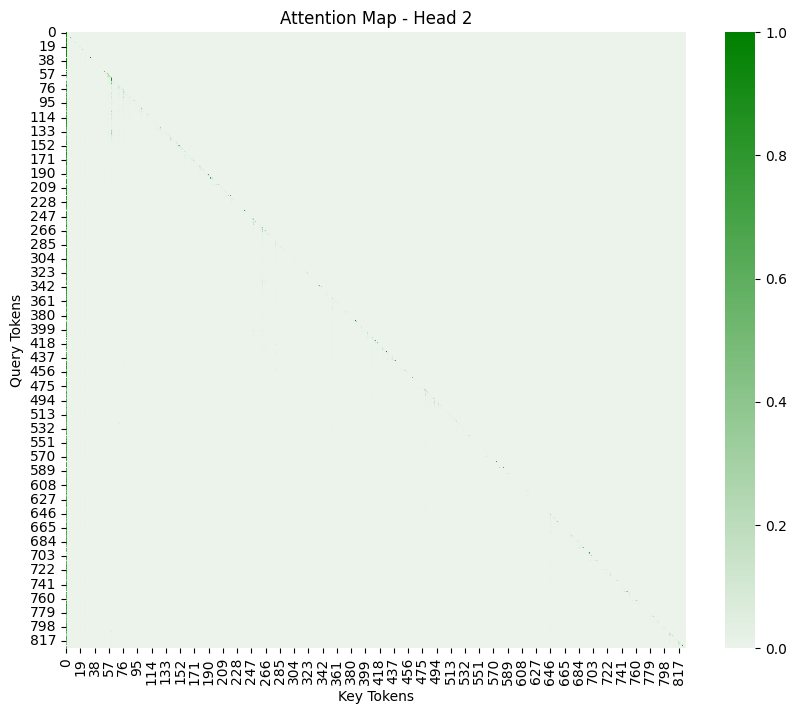

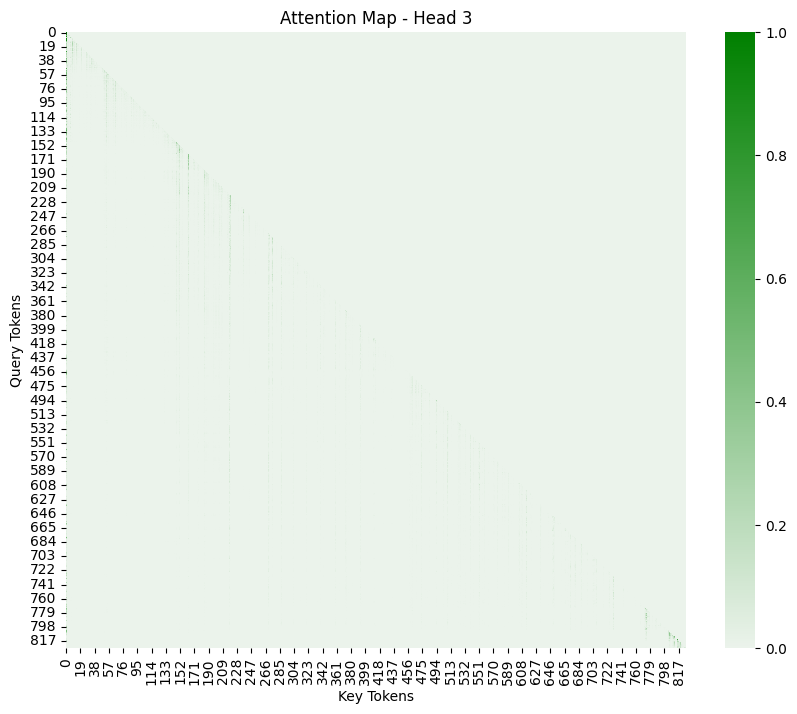

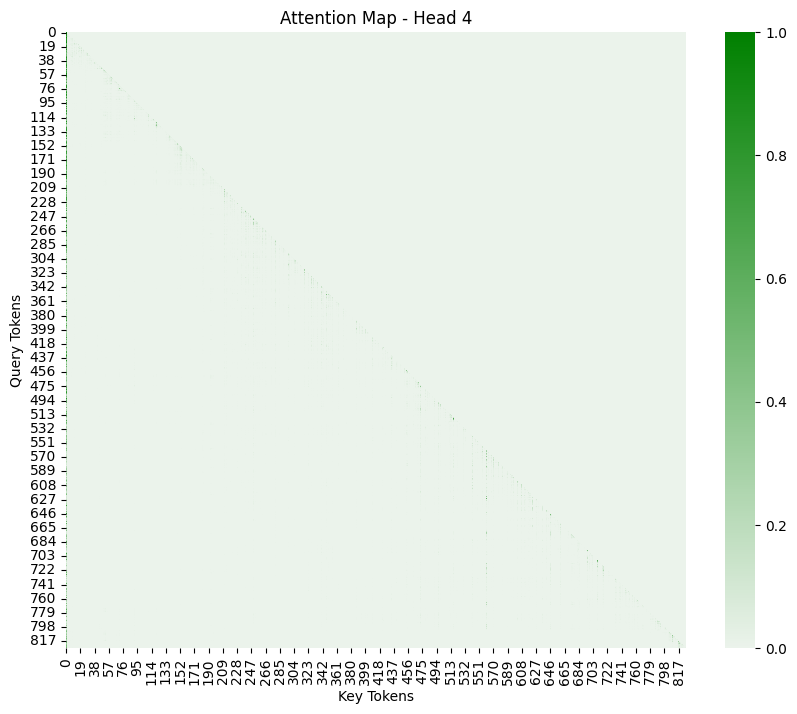

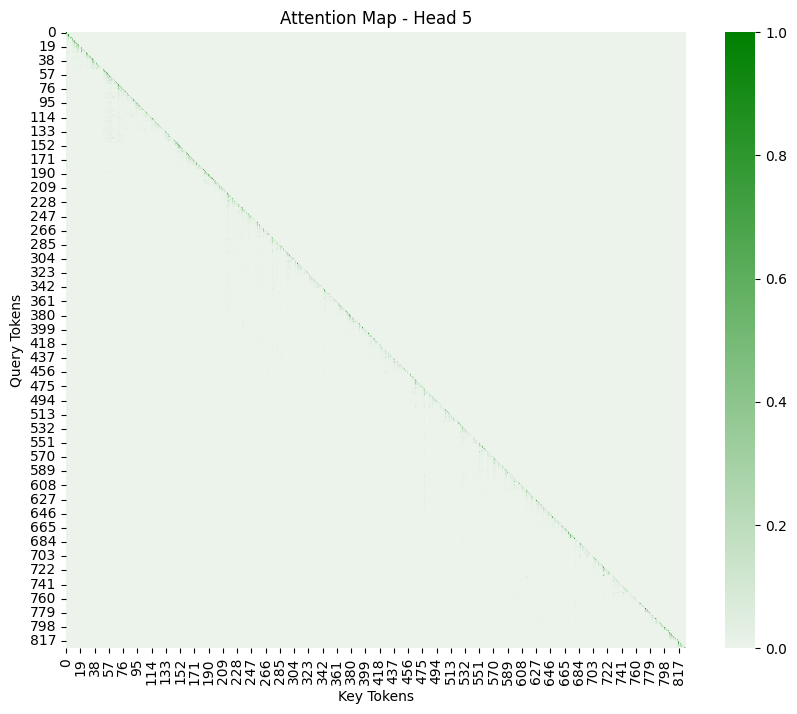

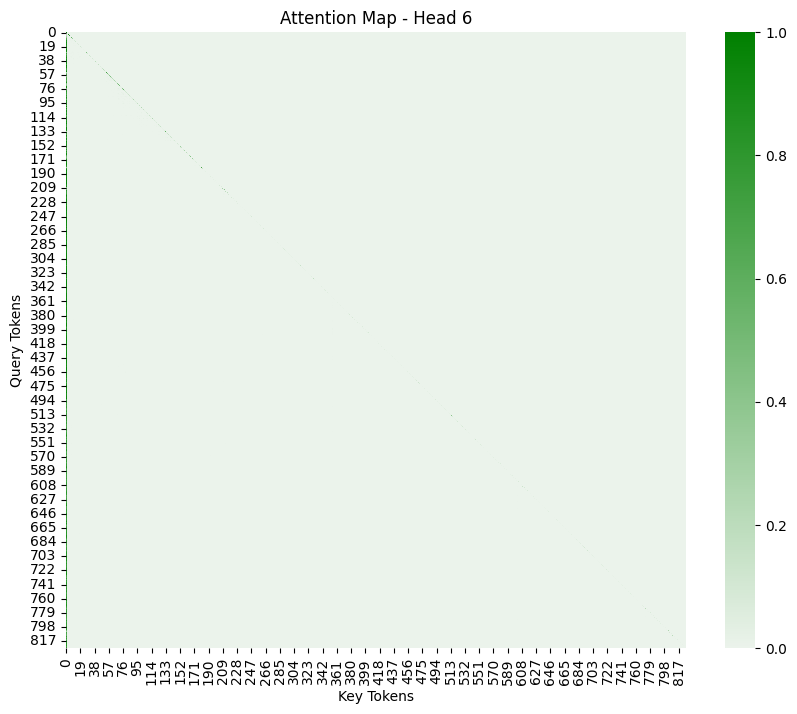

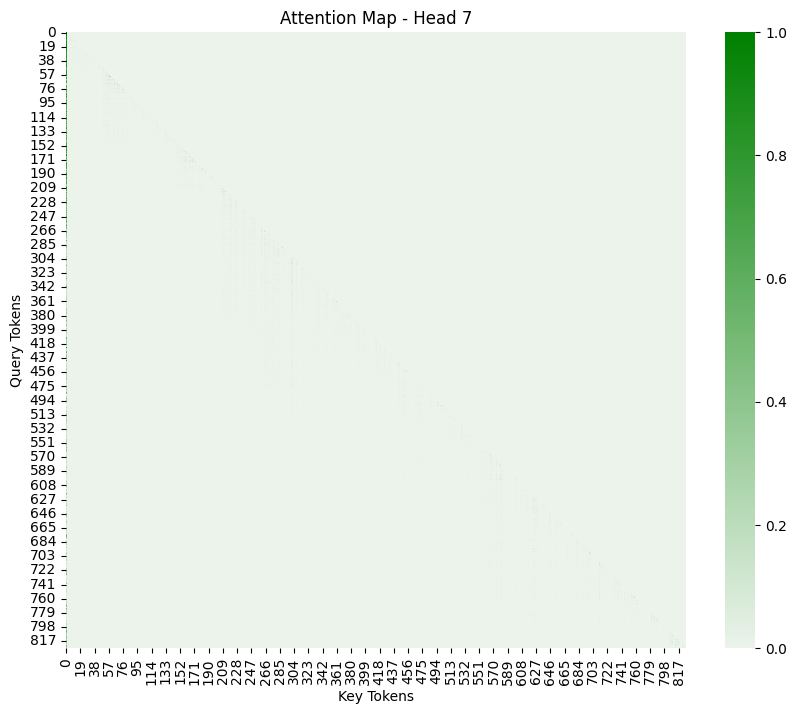

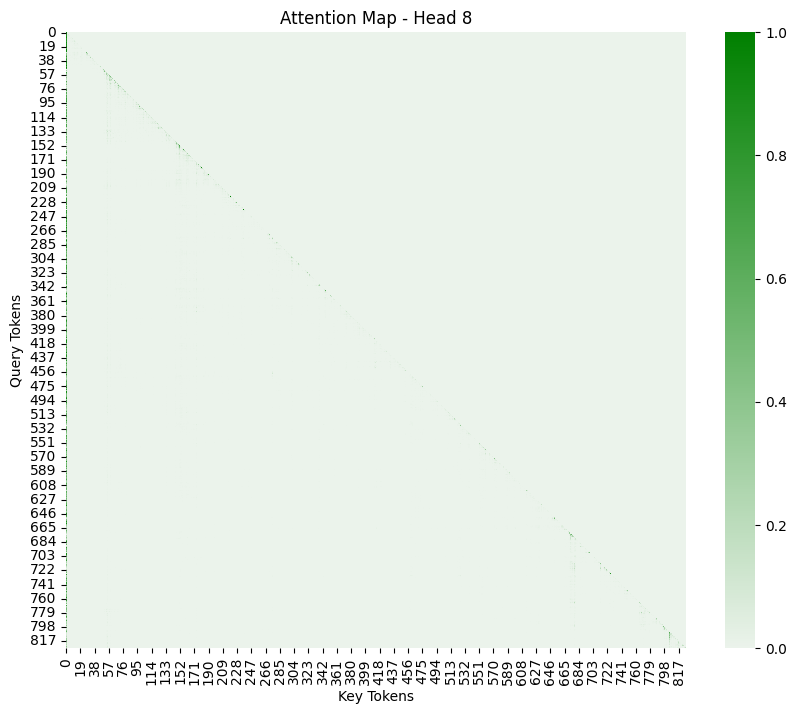

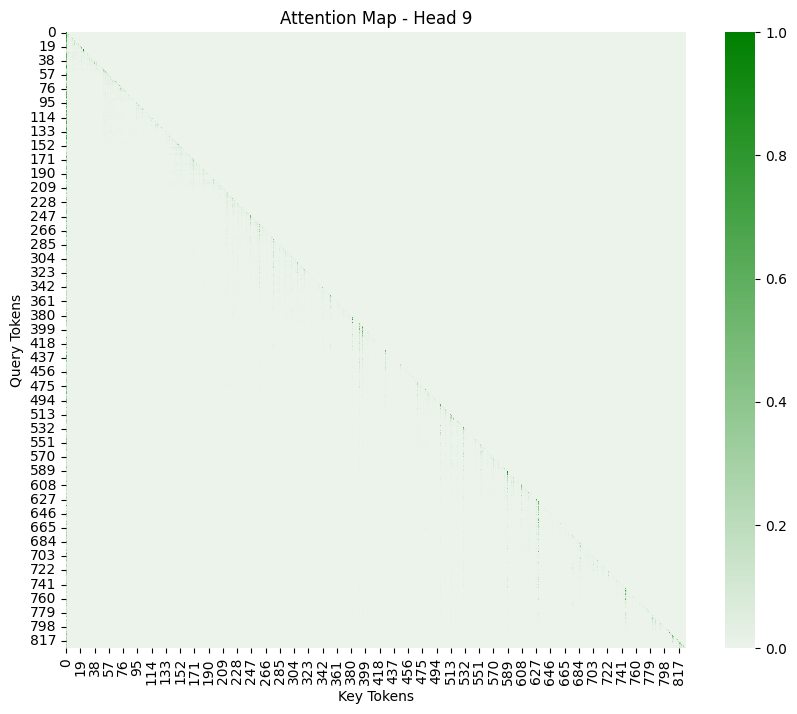

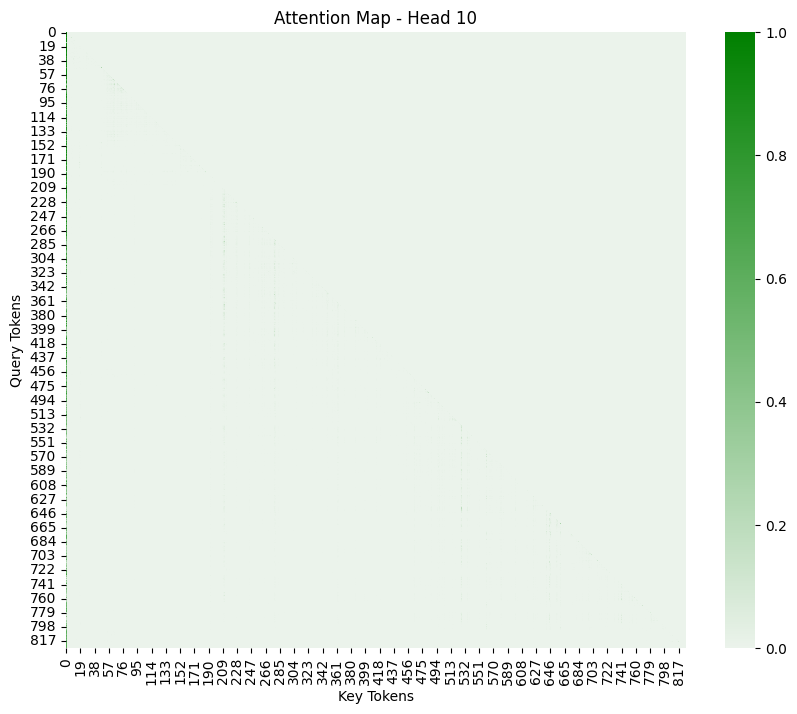

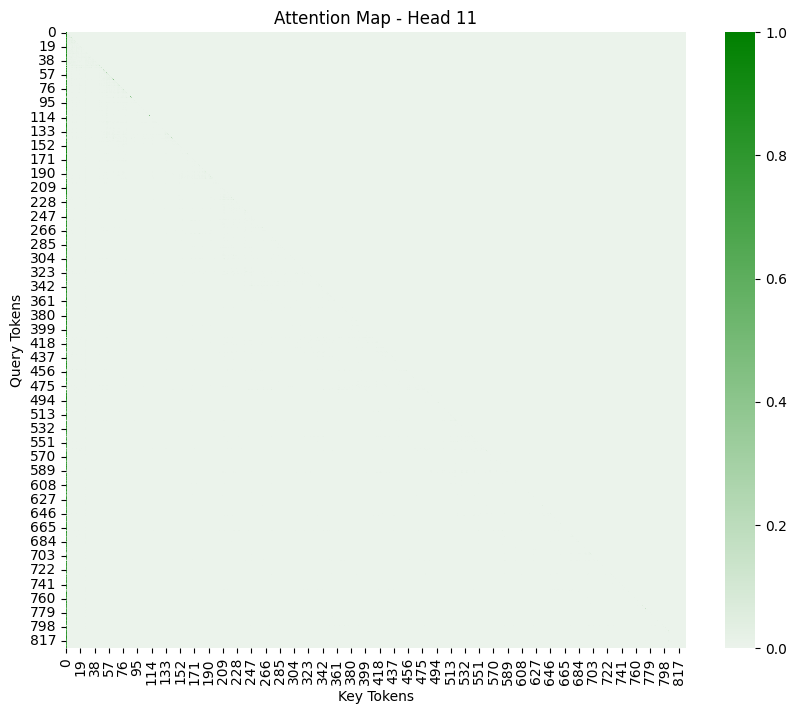

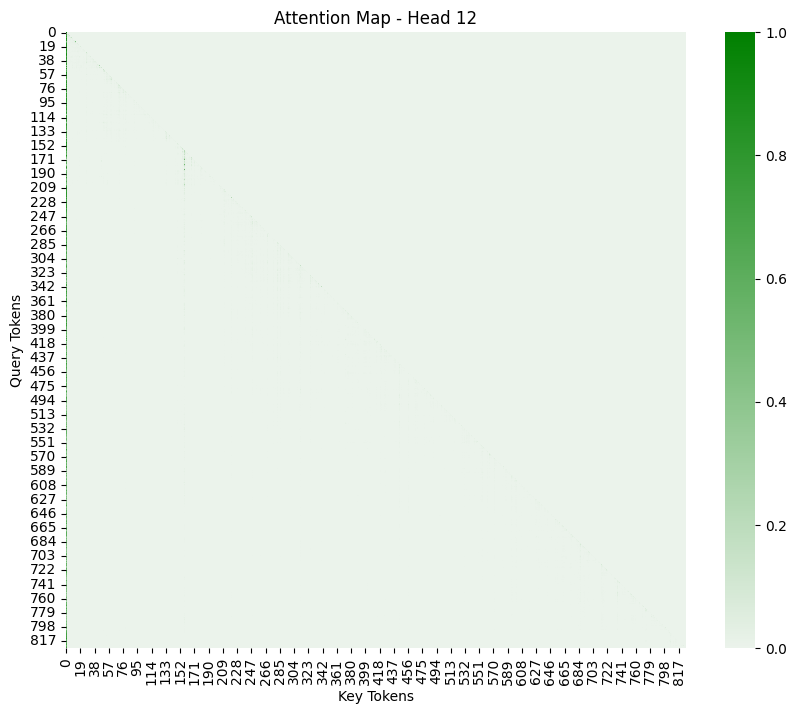

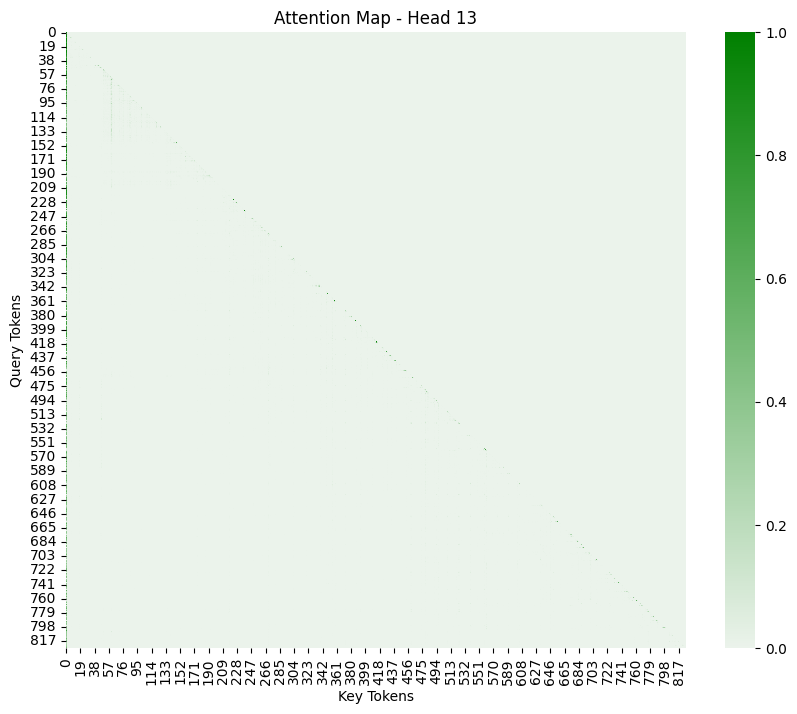

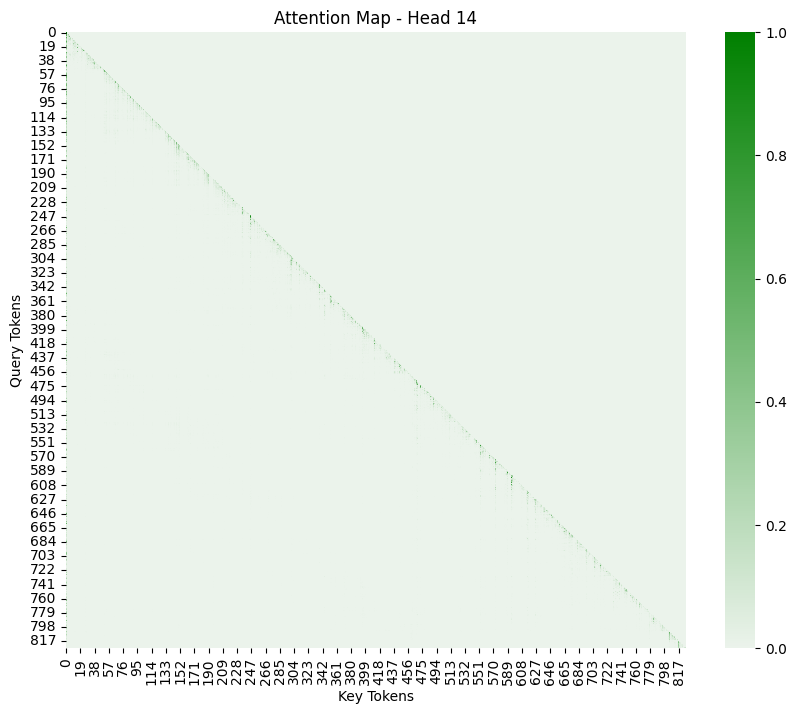

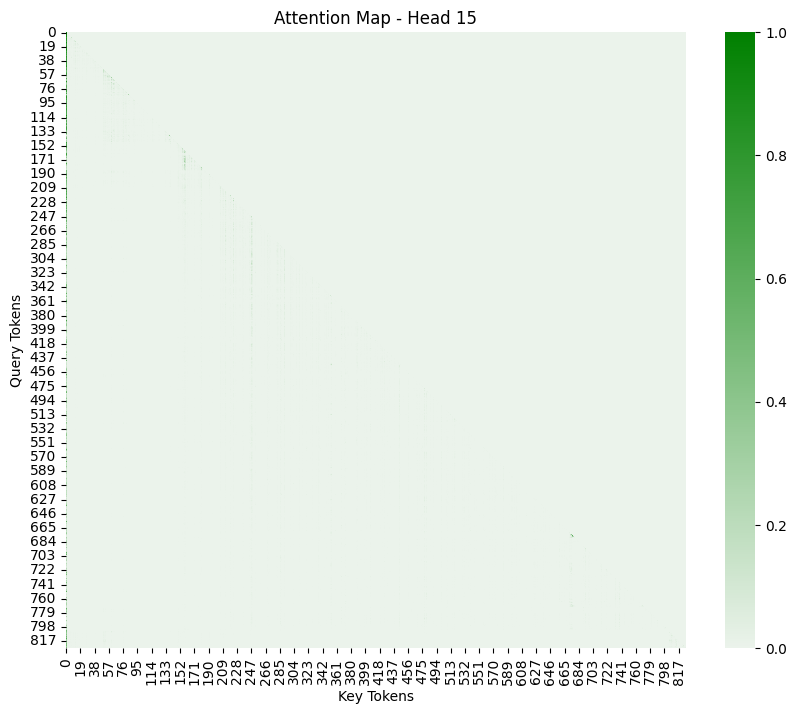

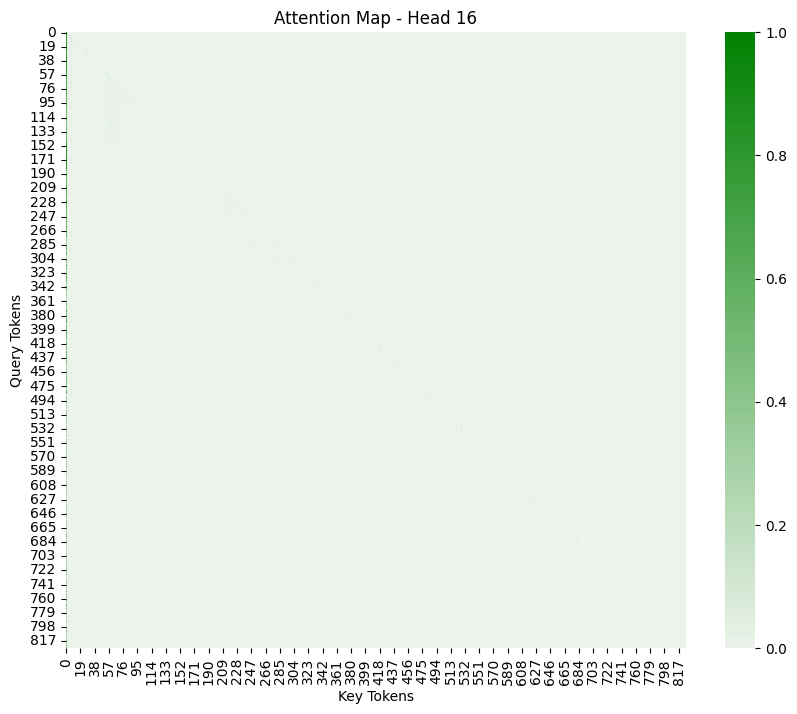

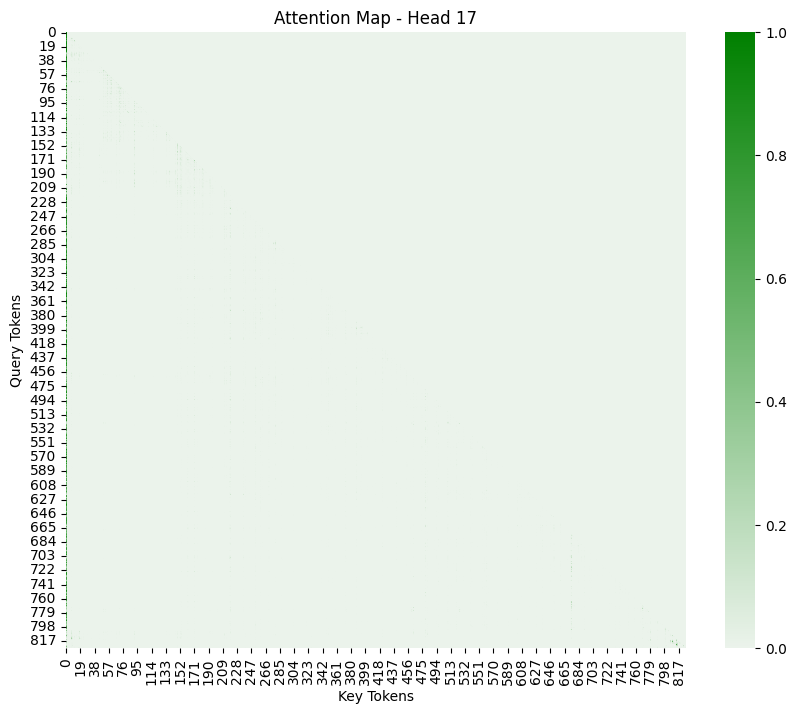

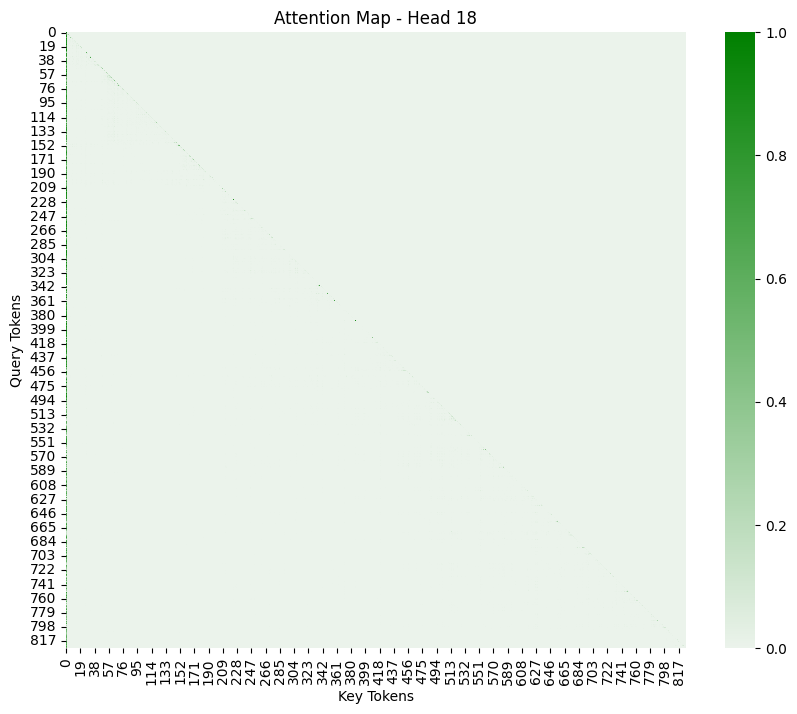

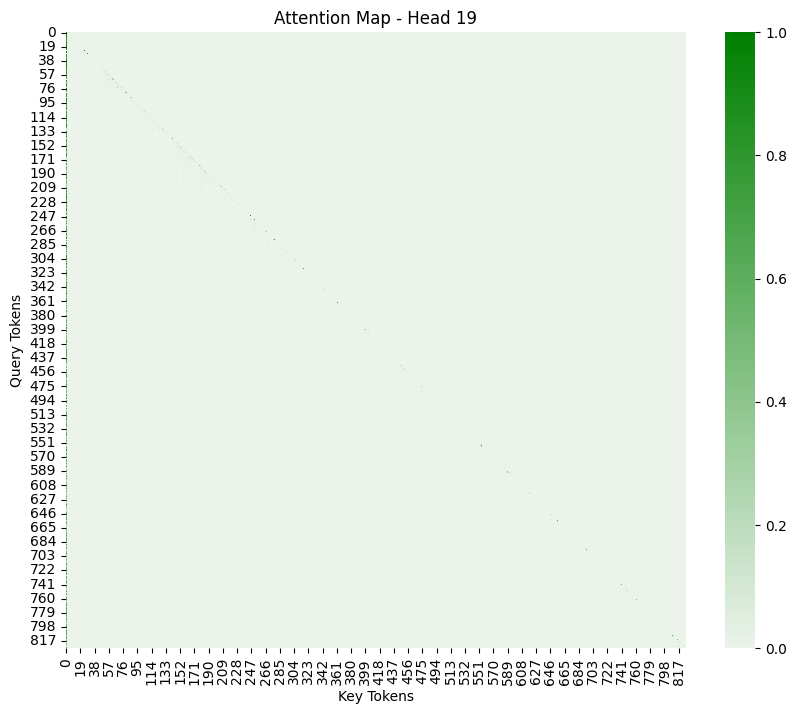

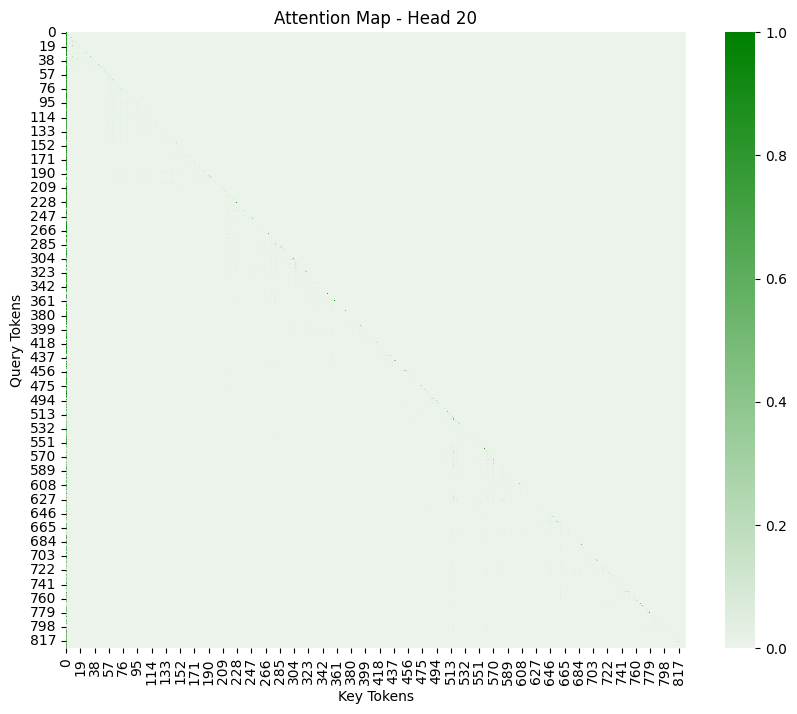

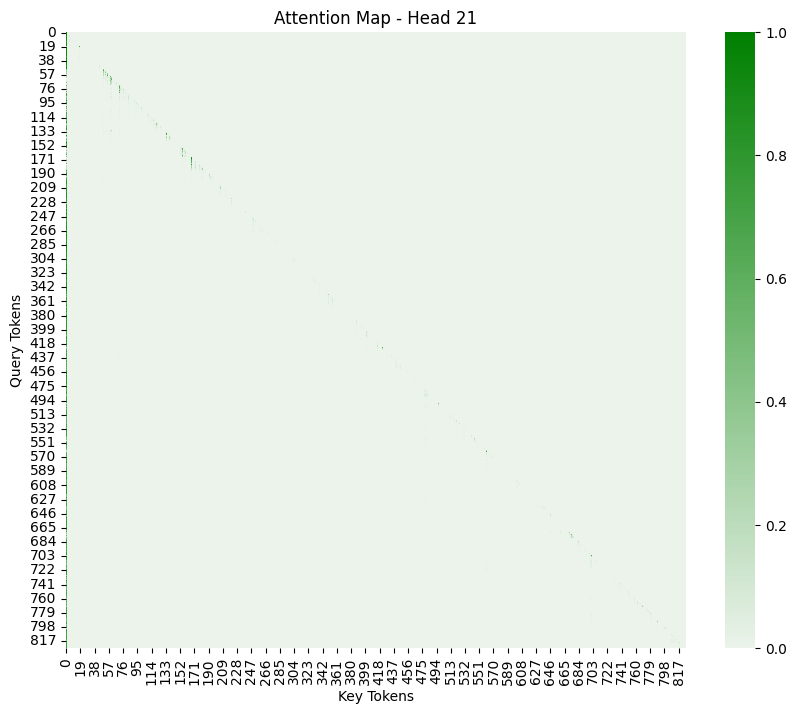

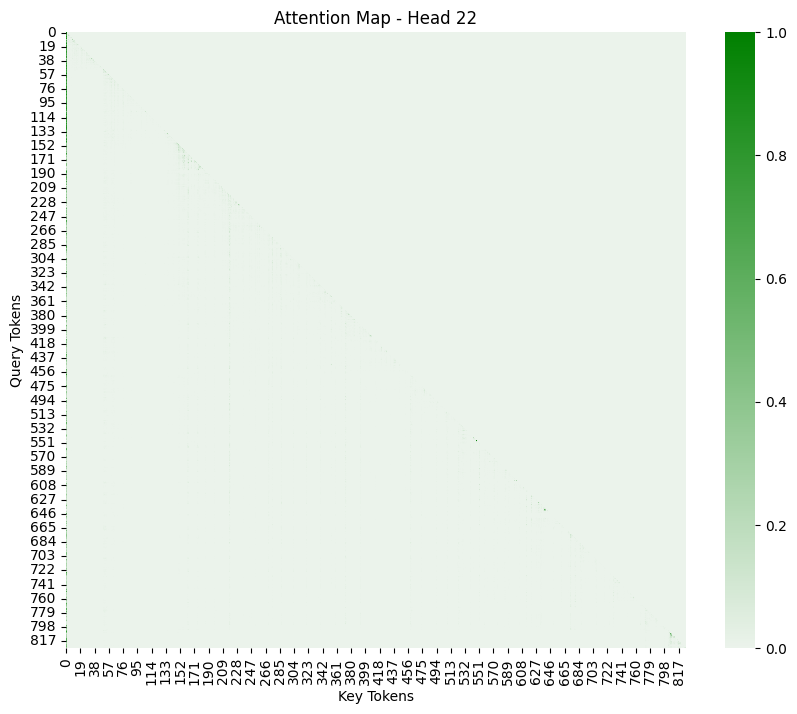

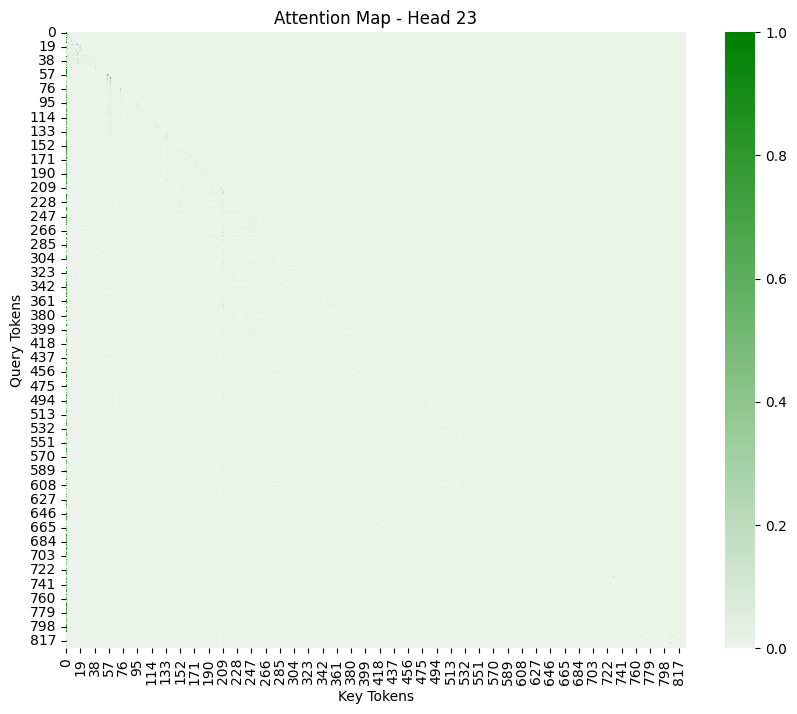

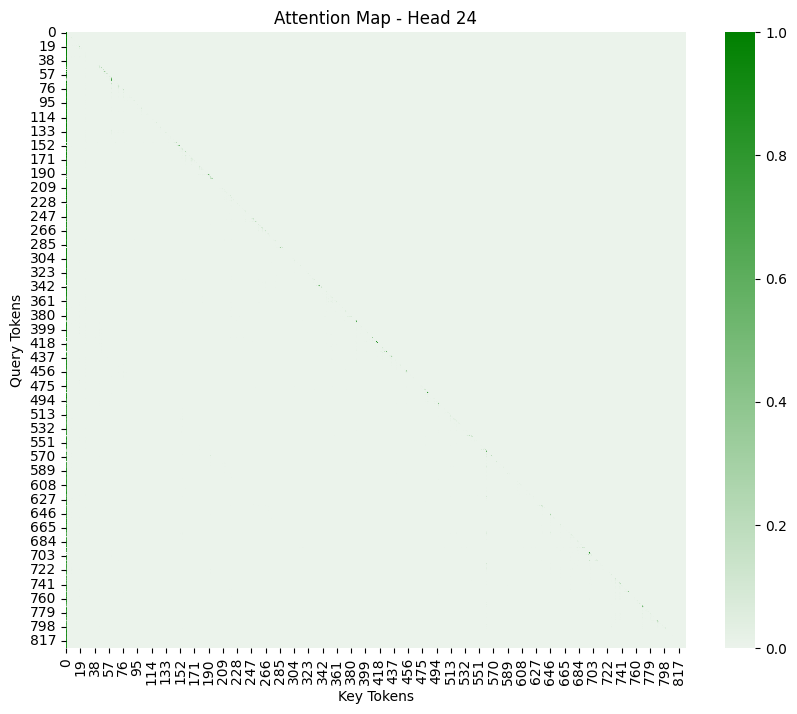

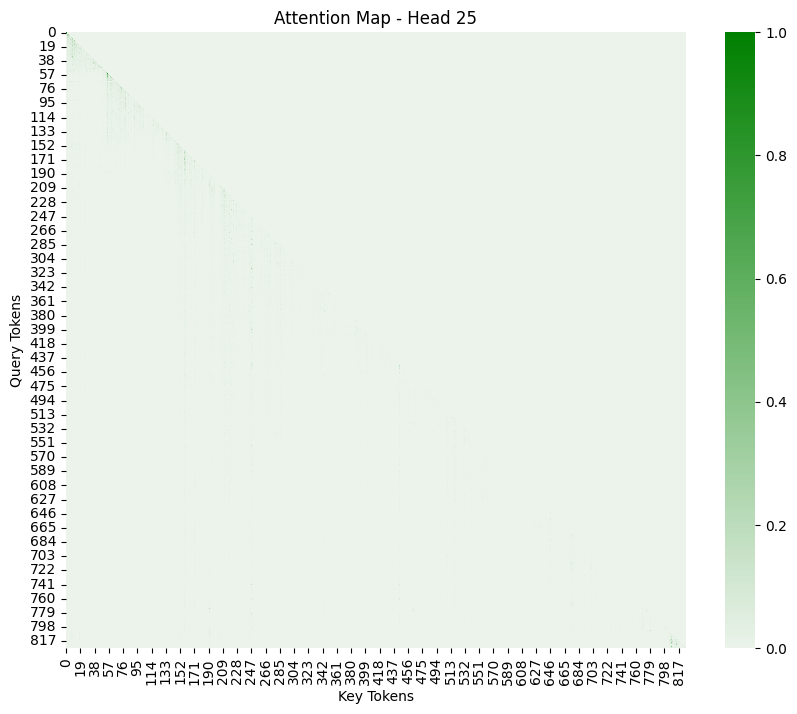

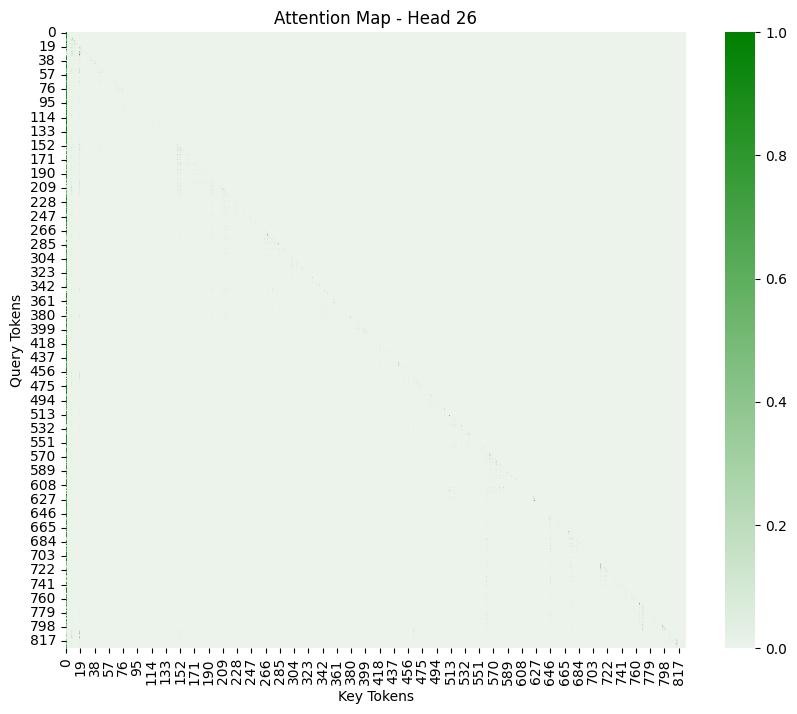

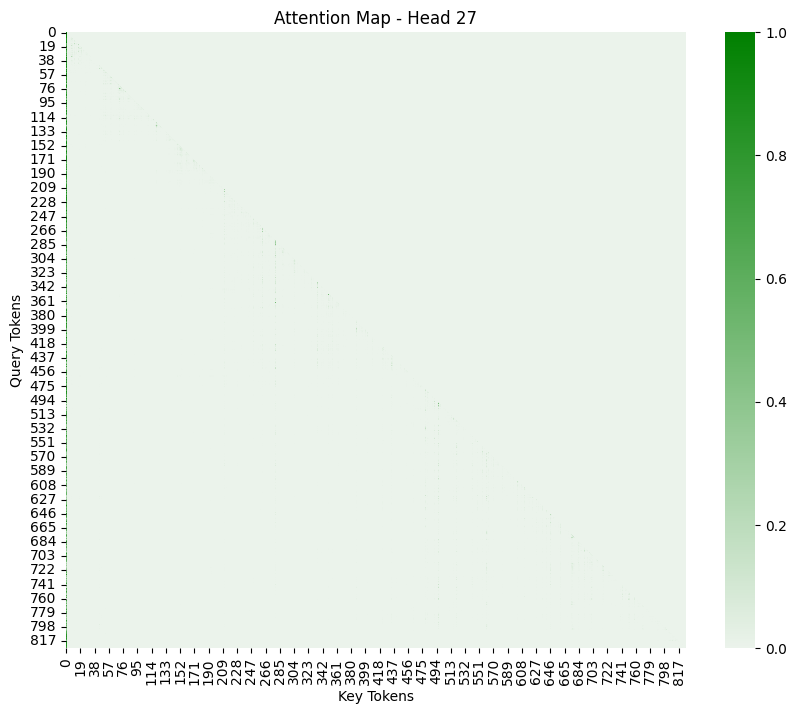

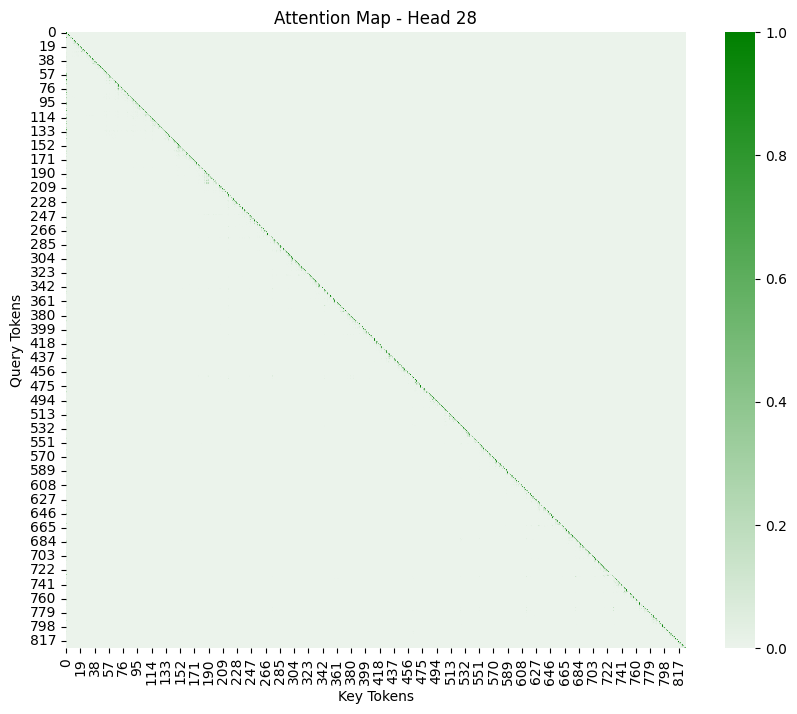

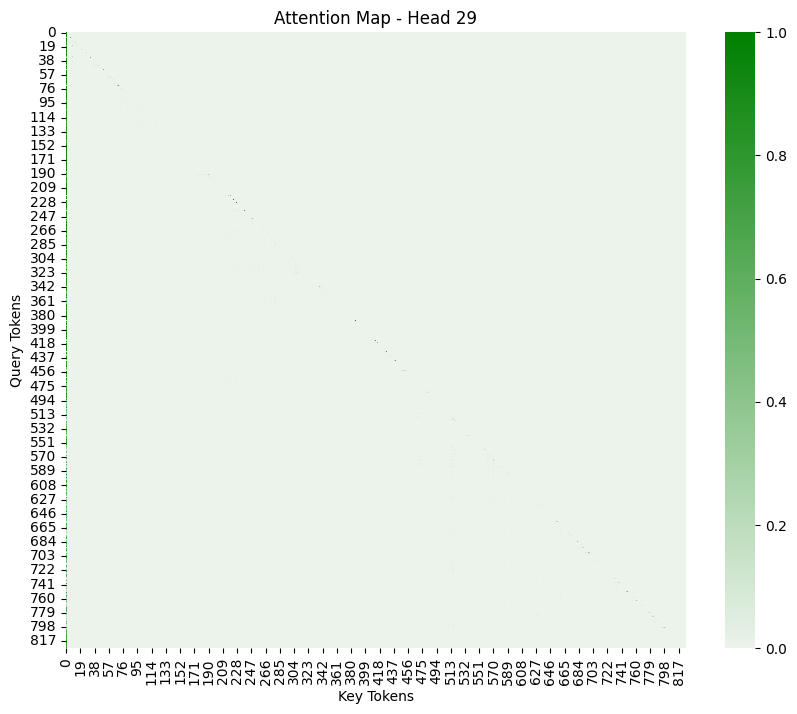

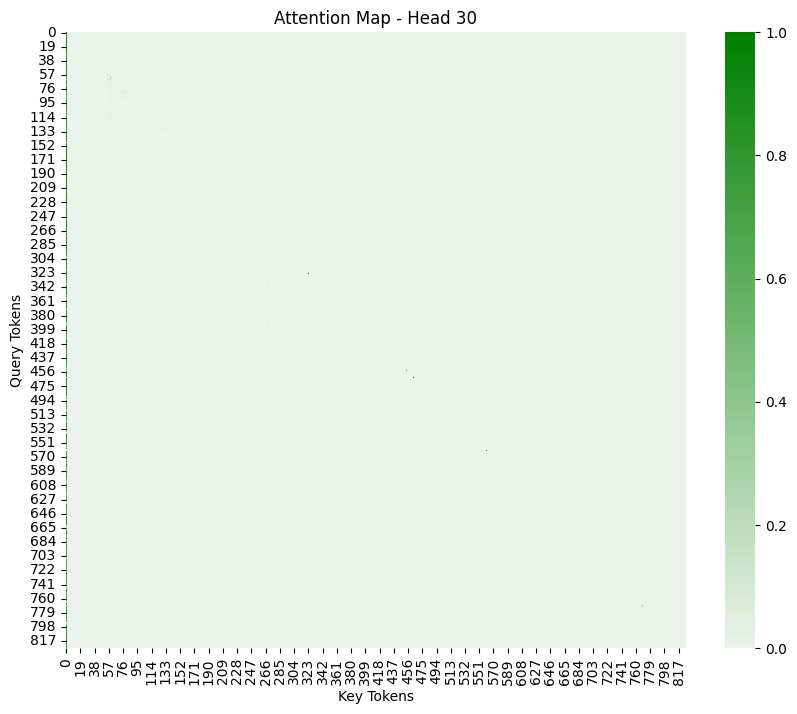

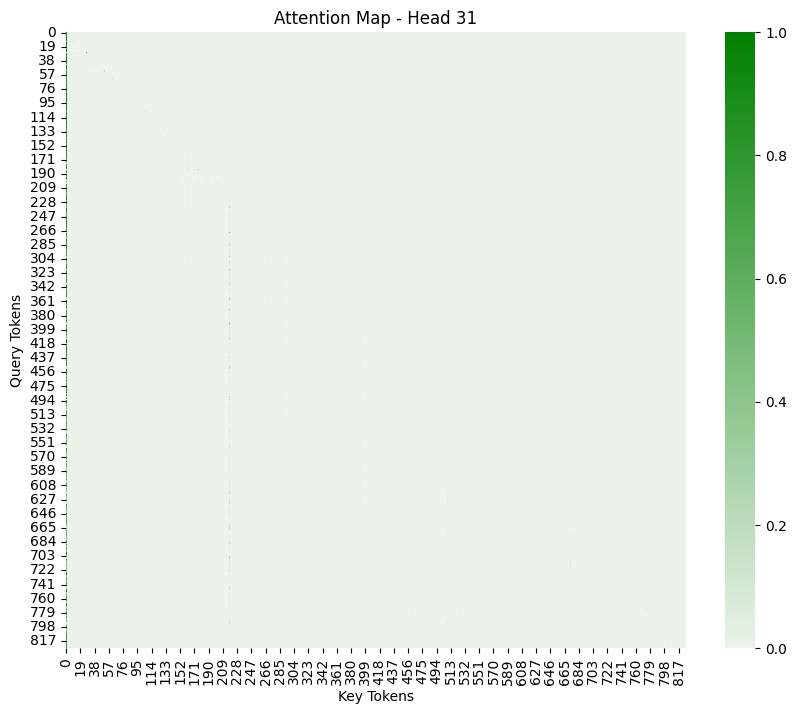

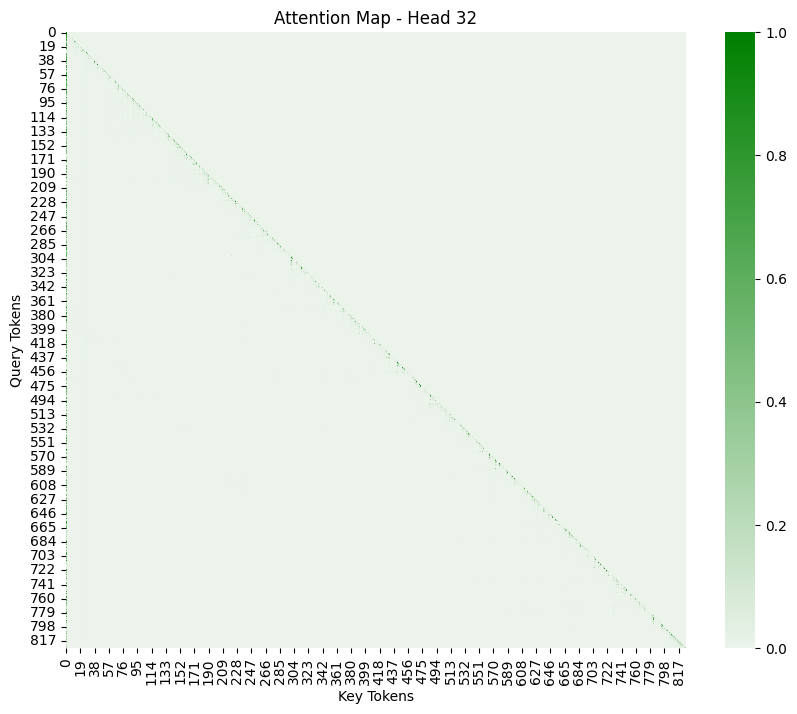

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
import numpy as np
layer_attention_scores = res['attentions'][0][-1].detach().cpu().numpy()

# 提取第一个序列的注意力得分
attention_map = layer_attention_scores[0]  # (num_heads, seq_len, seq_len)
custom_cmap = sns.light_palette("green", as_cmap=True)
# 可视化每个注意力头的注意力图
num_heads = attention_map.shape[0]
norm = Normalize(vmin=0, vmax=np.max(attention_map))
for head_idx in range(num_heads):
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_map[head_idx], cmap=custom_cmap, norm=norm)
    plt.title(f"Attention Map - Head {head_idx + 1}")
    plt.xlabel("Key Tokens")
    plt.ylabel("Query Tokens")
    plt.show()

In [12]:
base_model = AutoModelForCausalLM.from_pretrained(base_model_name, config=config).to('cuda:7')

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]
/opt/conda/envs/pan/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/opt/conda/envs/pan/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:520: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  

In [13]:
res = base_model.generate(input_ids, use_cache=True, output_attentions=True, max_new_tokens=64)

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096, padding_idx=0)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaDynamicNTKScalingRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm):

In [14]:
save_path = "/vepfs/wcf/G/zecheng/ckpt/dpo-llama/merge"
model = model.merge_and_unload()
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

ValueError: The generation config instance is invalid -- `.validate()` throws warnings and/or exceptions. Fix these issues to save the configuration.

Thrown during validation:
[UserWarning('`do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.'), UserWarning('`do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.')]